# Ch.6 비지도 학습  
## Ch 6-1 군집 알고리즘  
당연하지만 타깃이 없을 때 사용하는 ML algorithm이 바로 비지도 학습이다!  
즉, 정답레이블이 주어지지 않아서 알아서 묶어야함!

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300_data.npy

--2026-01-07 16:48:40--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-01-07 16:48:41--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-01-07 16:48:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300_data.npy')

In [4]:
print(fruits.shape)
# 출력에서 300개의 이미지가 100행 100열의 크기로 저장된 것을 알 수 있다.

(300, 100, 100)


In [5]:
fruits[0][0][:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

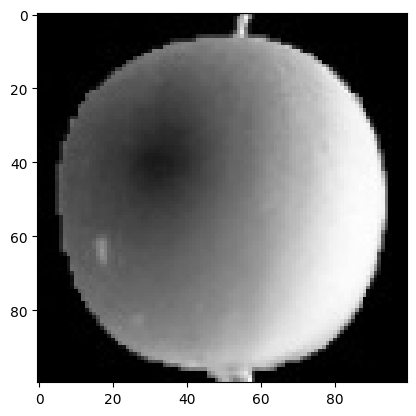

In [6]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

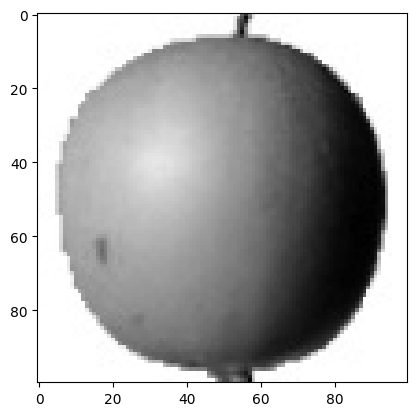

In [7]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

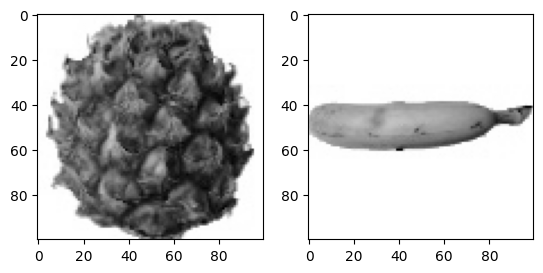

In [8]:
fig, axs = plt.subplots(1, 2) # 서브플롯 함수는 그래프를 쌓을 행과 열을 지정한다
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

#### 픽셀값 사용하기  
사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 각각 나누어 봅시다. 넘파이 배열을 나눌 때  
$100 \times 100$의 이미지를 펼쳐서 길이가 10000인 1차원 배열로 만든다. 이렇게 펼치면 이미지로 출력  
하긴 어렵지만 배열을 계산할 때 편리하다.

In [9]:
apple = fruits[:100].reshape(-1, 100*100) # 두 번째 차원과 세 번째 차원을 10000으로 합친다. 
pineapple = fruits[100:200].reshape(-1, 100*100) # 그리고 첫 번째 차원으로 -1로 자동으로 남은 차원 할당
banana = fruits[200:300].reshape(-1, 100*100)

In [10]:
print(apple.shape)

(100, 10000)


In [11]:
print(apple.mean(axis=1)) # apple 샘플 100개에 대한 픽셀 평균값 계산

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


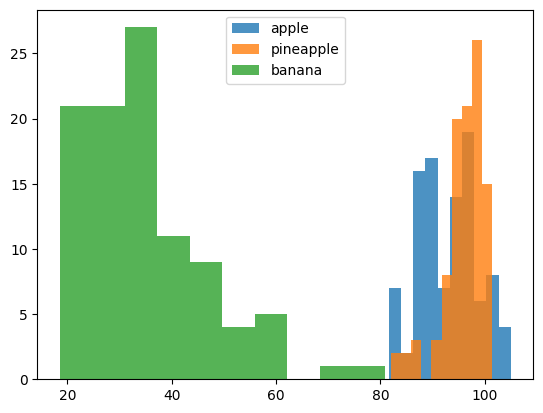

In [12]:
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()

위 히스토그램을 해석해보면 바나나 사진의 평균값은 40 아래에 집중되어 있다. 사과와 파인애플은 90~100사이에  
많이 모여있음! 이 그림만 보면 다른 과일과 확연히 바나나는 구분됨을 알 수 있다. 근데 사과와 파인애플은 쉽지  
않아 보임! 좀 더 나은 방법이 없는가? 샘플별 평균값이 아닌 픽셀별 평균값으로 계산하면? 왜? 세 과일의 모양이  
다르니까!! 픽셀값의 높은 위치가 조금 다를거 아니야!

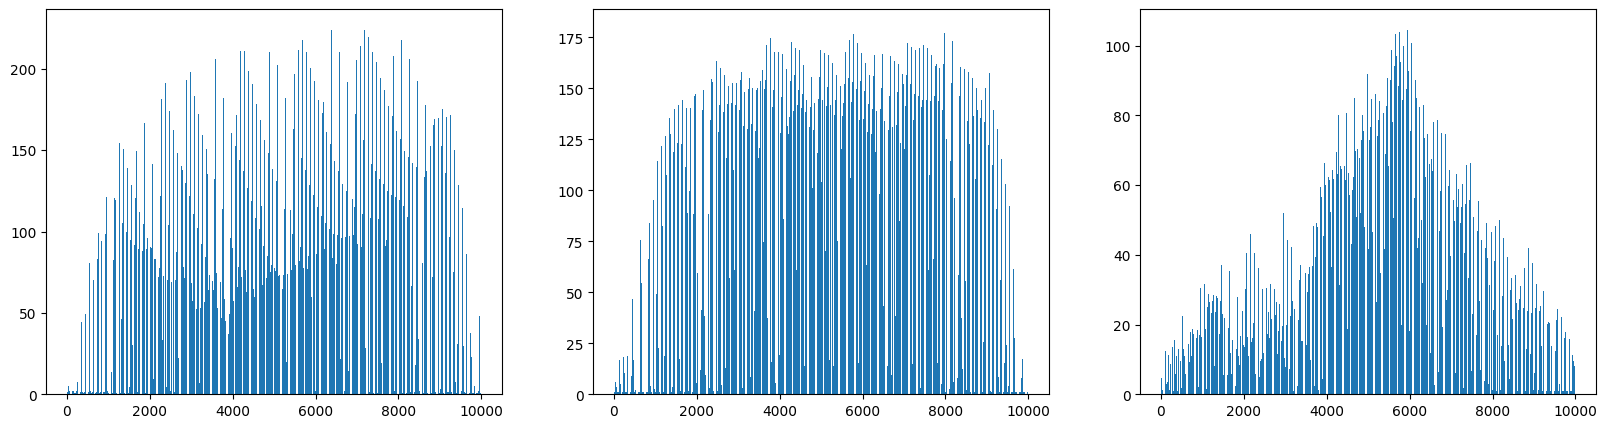

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

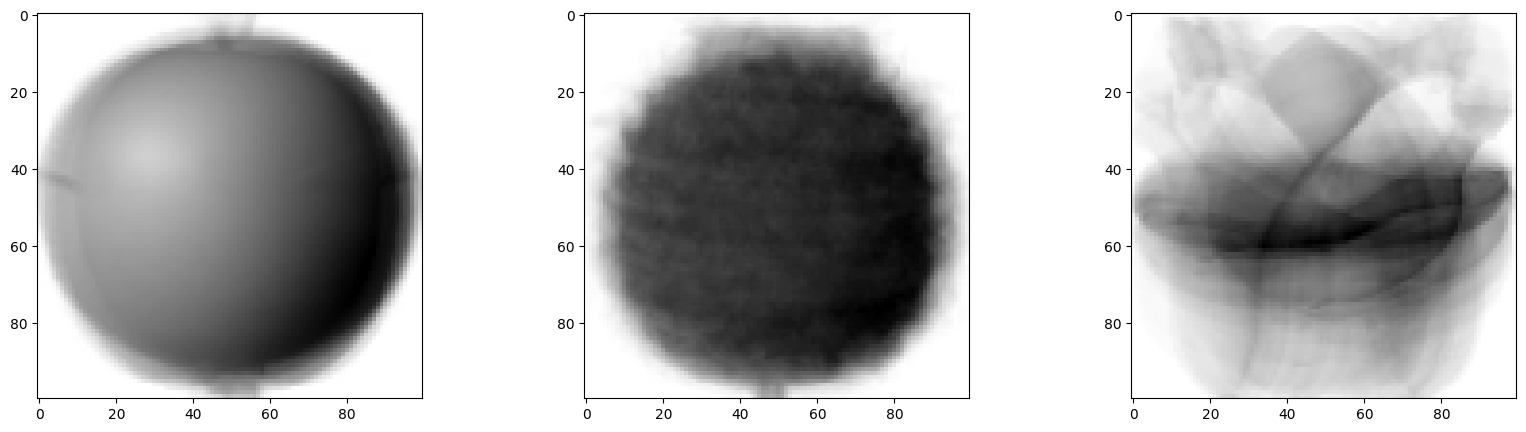

In [14]:
apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [15]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


위 코드는 사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 고르기 위해 모든 샘플에서 apple_mean을  
뺀 절댓값 평균을 계산하는 것이다. 이때 abs_diff는 원래 샘플의 사이즈인 (300,100,100) 크기의 배열이고  
따라서 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정했다. 이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 300행 1열인 1차원 배열이다!

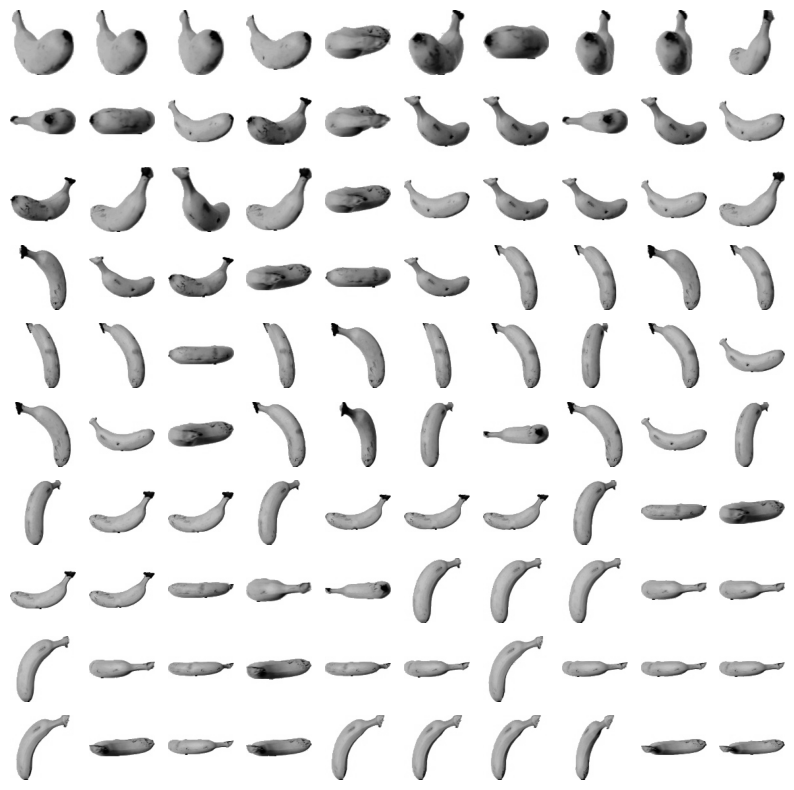

In [16]:
apple_index = np.argsort(abs_mean)[200:] # 여기서 argsort는 오름차순으로 나열된 abs_mean의 인덱스를 반환
apple_index = apple_index.reshape(10, 10) # 위에서 정렬된 apple_index 변수를 10*10 모양으로 바꿈
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i,j]], cmap='gray_r')
        axs[i, j].axis('off')

plt.show()

이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 군집(Clustering)이라고 한다. 군집은 대표적인 비지도학습  
위에서 말하다 싶이 군집 알고리즘에서 만든 그룹을 cluster라고 한다. 물론 위 사례는 너무나 당연하게도  
바나나, 파인애플, 사과라는 타깃값을 알고 있었기에 엄밀하게 실제 비지도 학습이랑은 다른 상황이다!  
실제 비지도 학습에서는 타깃값을 모르기에 이처럼 샘플의 평균값을 미리 구할 수 없다!

### 6-2 K-means
역시 대표적인 군집 알고리즘 중 하나로 평균값을 자동으로 찾아준다! 이 평균값이 클러스터의 중심에 위치하기  
때문에 클러스터 중심 or Centroid라고 부른다! 

In [17]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2026-01-07 16:49:05--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-01-07 16:49:05--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-01-07 16:49:05--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... c

In [18]:
import numpy as np
fruits = np.load('fruits_300_data.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [20]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [21]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [22]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    
    plt.show()

위의 draw_fruits 함수는 (샘플 개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력한다!  
샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정합니다. figsize는 ratio 매개변수에 비례하여 커집니다.  
ratio의 기본값은 1입니다. 그 다음 2중 반복문 사용해서 첫 번째 행을 따라 이미지를 그린다. 그리고 두 번째 행의 이미지를 그리는 식으로 계속된다. 

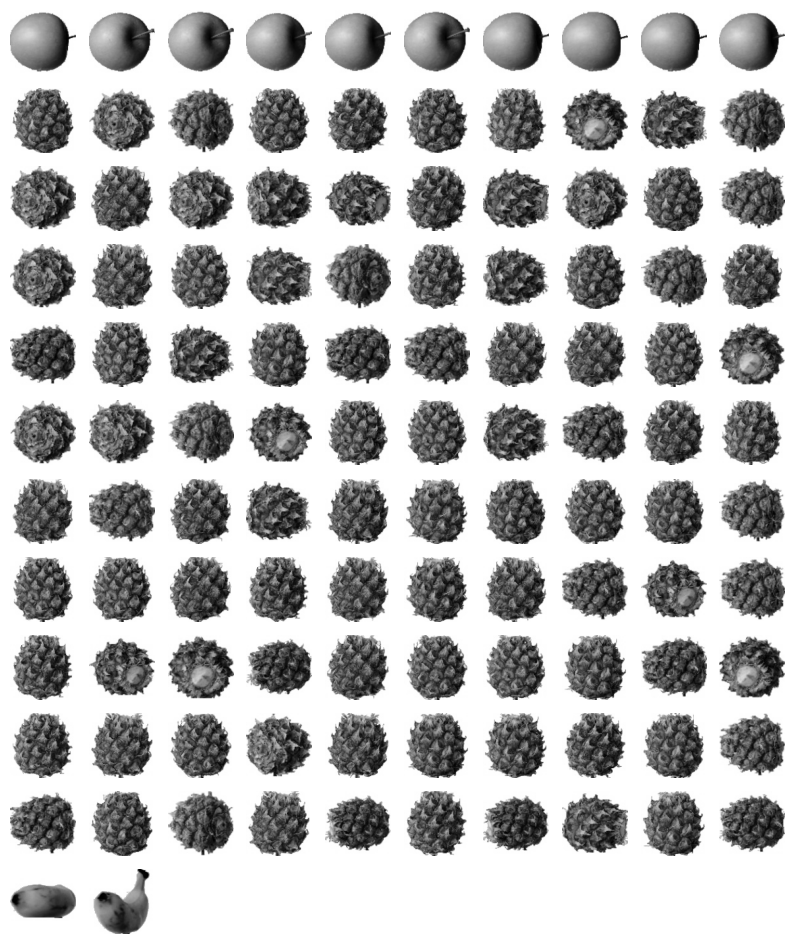

In [23]:
draw_fruits(fruits[km.labels_==0])

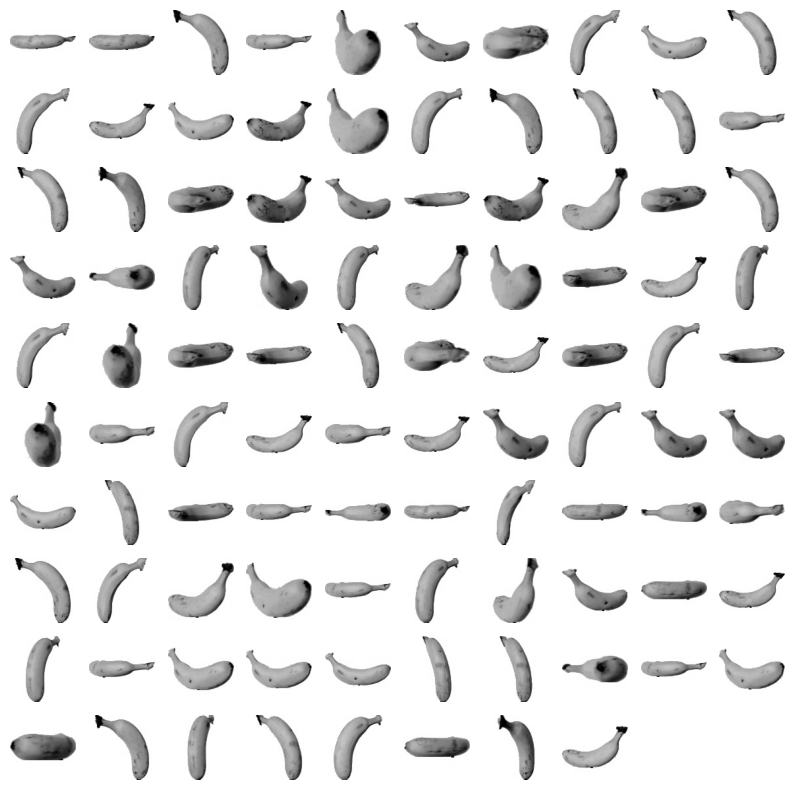

In [24]:
draw_fruits(fruits[km.labels_==1])

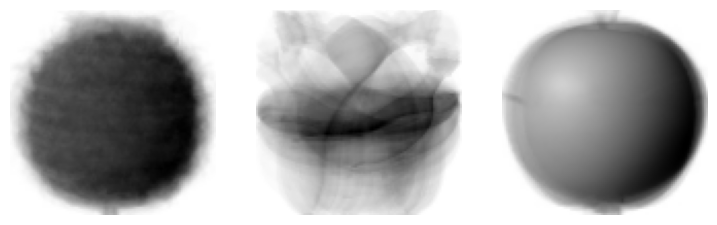

In [25]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [26]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


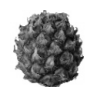

In [27]:
draw_fruits(fruits[100:101])

In [28]:
print(km.n_iter_) # 저장된 알고리즘의 반복 횟수

4


#### 최적의 k는 어떻게 찾을 것인가?  
k-means 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것이다. 그럼 어떻게해야 적절한  
k값을 찾을 수 있으려나? 여기서는 적절한 클러스터 개수를 찾기 위한 대표적인 방법인 엘보우 방법에 대해 알아
본다! 앞에서 본 것처럼 k-means 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다!  
이 거리의 제곱 합을 inertia라고 부른다! 물리에서의 inertia가 아님!!

아무튼 클러스터의 개수를 증가시키면 클러스터 개개의 크기도 줄어들기 때문에 이너셔도 줄어든다. 엘보우 방법은  
클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법임.  
방법은 아래와 같다  
1. 클러스터 개수를 증가시키면서 inertia를 그래프로 그림  
2. inertia가 감소하는 속도가 꺾이는 지점이 있음  
3. 해당 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않는다

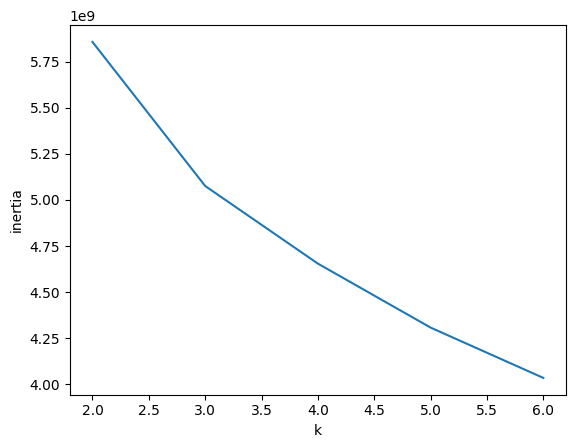

In [29]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [29]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2026-01-07 16:46:05--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-01-07 16:46:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-01-07 16:46:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [34]:
print(pca.components_.shape) # pca 클래스가 찾은 주성분의 배열 크기     

(50, 10000)


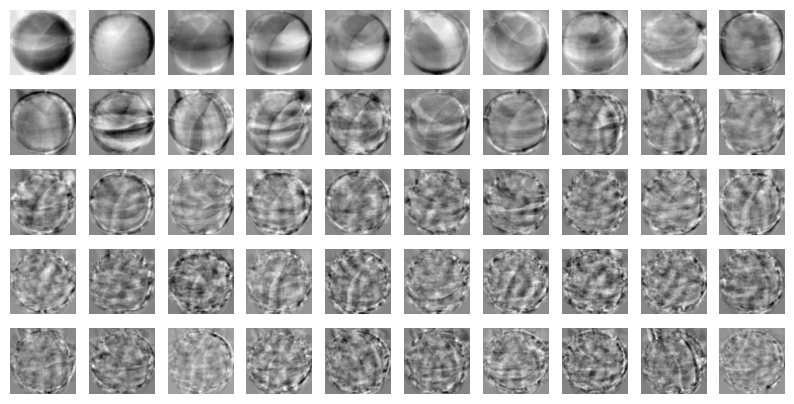

In [33]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [35]:
print(fruits_2d.shape)

(300, 10000)


In [37]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


앞에서 10000개의 특성을 50개로 줄임! 당연힌 이로 인해 어느 정도 손실이 발생할 수밖에 없다!  
그러나 최대한 분산이 큰 방향으로 데이터를 투영했기에 원본 데이터를 상당 부분 재구성할 수 있다ㅇㅇ

In [38]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


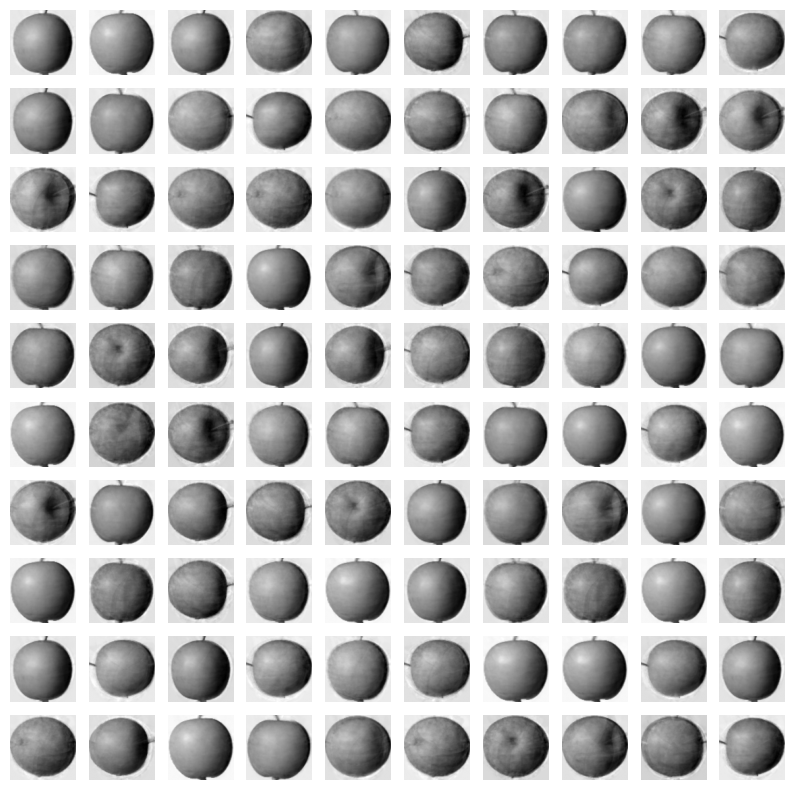

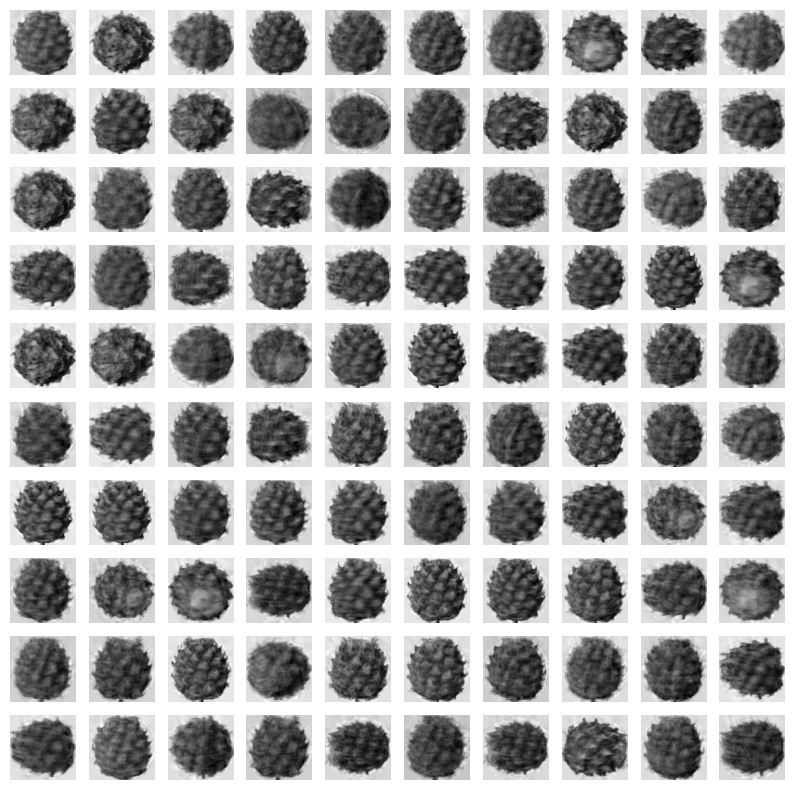

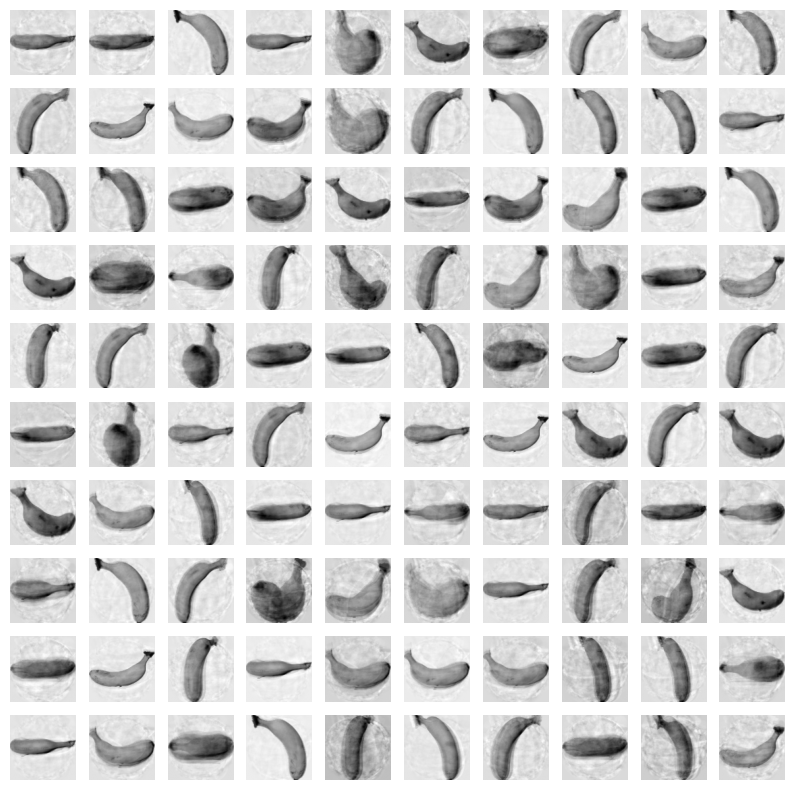

In [39]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

주성분이 원본 데이터 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다! 당연히 첫 번째 주성분의  
설명된 분산이 가장 크다! 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을   
얻을 수 있다!!!

In [40]:
print(np.sum(pca.explained_variance_ratio_  ))

0.9215096304816118


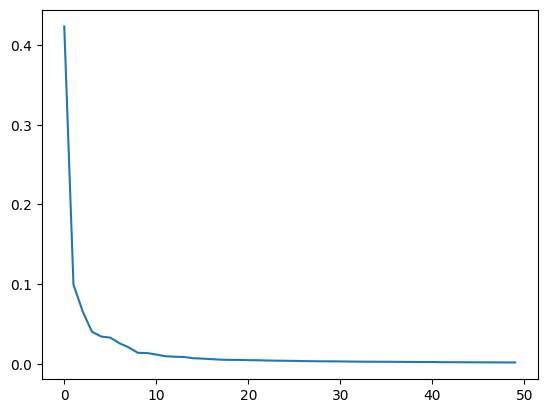

In [41]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

위 그래프를 통해 처음 10개의 주성분이 대부분의 분산을 표현하고 있다! 그 다음부터는 각 주성분의 설명력은  
비교적 너무 작다! 아래에서는 PCA로 차원 축소된 데이터를 사용하여 지도학습 모델을 훈련한다!  
원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인해봐라!

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [43]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
5.161869621276855
